Once deleted, variables cannot be recovered. Proceed (y/[n])? y


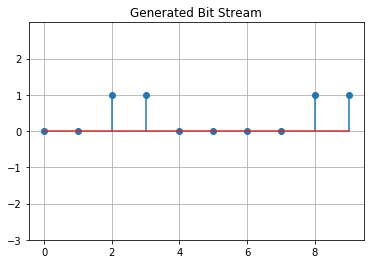

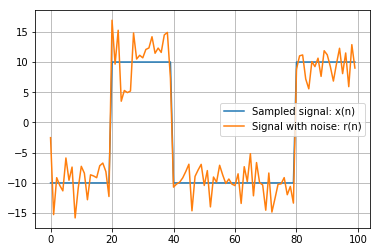

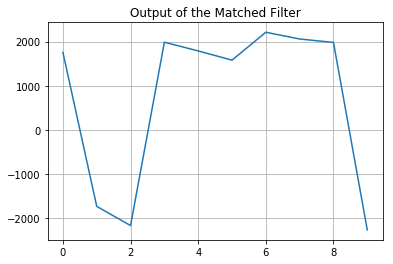

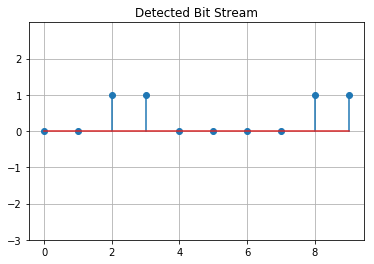

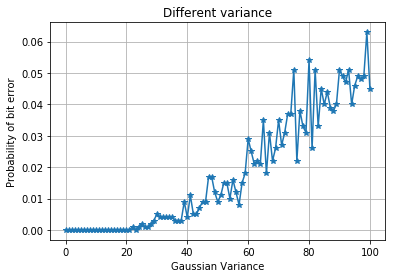

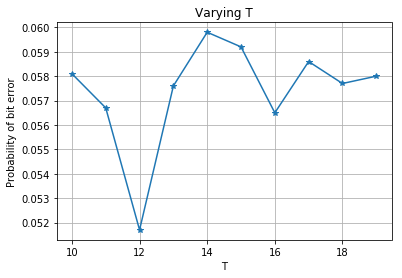

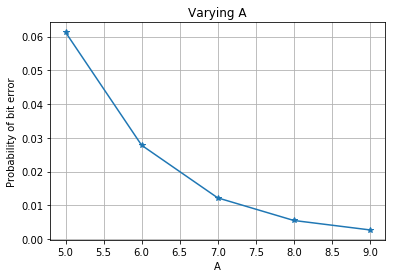

In [28]:
%reset
from matplotlib import pyplot as plt
import numpy as np
import math
import random
from datetime import datetime
import statistics as st
import sympy as sym
import scipy.linalg as ddtt
np.set_printoptions(2);
random.seed(datetime.now())


#generate noise
def awgn(var,l):
    std_dev=np.sqrt(var);
    arr=[];
    arr=np.random.randn(1,l)*std_dev;
    return arr;

          
N = 10;
to_plot = [];
x_axis = [];

## arg1 = variance, arg2 = Amplitude, arg3 = T
def func(arg1,arg2,arg3,S,N):
    T = arg3;
    A = arg2;
    var = arg1;
    det= 10;    #det is number of samples in one T interval
    Ts = T/det;
    array=[[0 for x in range(N)] for y in range(S)];
    for i in range(0,S):
        for j in range (0,N):
            array[i][j] = int(random.uniform(0,2))

    #generate NRZL
    NRZ=[[0 for x in range(N)] for y in range(S)];
    for i in range(0,S):
        for j in range(0,N):
            if array[i][j] == 0:
                NRZ[i][j] = -A
            else:
                NRZ[i][j] = A

    #sample the obtained signal
    sampled = [[0 for x in range(math.ceil((N*T)/Ts))] for y in range(S)];
    for i in range(0,S):
        j = 0;
        while(j*Ts < (N)*T):
            curr = int((j*Ts)/T);
            sampled[i][j]=NRZ[i][curr];
            j+=1;
    
    #add noise to the signal
    r=[[0 for x in range(math.ceil((N*T)/Ts))] for y in range(S)];
    for i in range(0,S):
        noise = awgn(var,len(sampled[0]));
        for j in range(0,len(sampled[0])):
            r[i][j] =sampled[i][j]+ noise[0][j];
    
    #match filter
    Filtr = [];#s1-s2 where s1 and s2 are signals given to us
    for i in range(0,det):
        Filtr.append(2*A);    

    
    #generating the output from the match filter and coparing it with original signal 
    op = [[] for x in range(0,S)];
    Err = [];
    
    for i in range(0,S):
        res2=[];
        for j in range(0,N):
            arr = [];
            for k in range(0,det):
                idx = j*det + k;
                arr.append(r[i][idx]);
            res = np.dot(arr,Filtr);
            res2.append(res);
            if(res >= 0):
                op[i].append(1);
            else:
                op[i].append(0);
       
        scal = 0;
        #Calculate the error
        for p in range(0,N):
            scal += abs(array[i][p] - op[i][p]);
        Err.append(scal);
    to_plot.append((np.mean(Err)/10));
    return array[0][:],sampled[0][:],r[0][:],res2,op[0][:];


    #print('Inputs followed by their corresponding outputs');
    #for i in range(0,S):
    #    print(array[i]);
    #    print(op[i]);
    #    print('\n');

    #print('Pb');
    #print((np.mean(Err))/10);
    
#Sample to explain the steps involved
ip,xn,rn,filtered_op,op=func(10,10,2,100,10)
plt.stem(ip)
plt.title('Generated Bit Stream')
plt.grid()
plt.ylim([-3,3])
plt.yticks([i for i in range(-3,3)])
plt.show()

plt.plot(xn,label='Sampled signal: x(n)')
plt.plot(rn,label='Signal with noise: r(n)')
plt.legend()
plt.grid()
plt.show()



plt.plot(filtered_op)
plt.title('Output of the Matched Filter')
plt.grid()
plt.show()

plt.stem(op)
plt.title('Detected Bit Stream')
plt.grid()
plt.ylim([-3,3])
plt.yticks([i for i in range(-3,3)])
plt.show()




#For different Gaussian Variance  
to_plot.clear();
for f in range(0,101):
    func(f,5,2,100,10);
    x_axis.append(f);
plt.plot(x_axis,to_plot,marker='*');
plt.xlabel('Gaussian Variance')
plt.ylabel('Probability of bit error')
plt.title('Different variance')
plt.grid()


#For different T
to_plot.clear();
x_axis.clear();
plt.figure();
for f in range(10,20,1):
    x_axis.append(f);
    func(100,5,f,1000,10);         ###it takes some time to run() for s >= 10000
plt.plot(x_axis,to_plot,marker='*');
plt.xlabel('T')
plt.ylabel('Probability of bit error')
plt.title('Varying T')
plt.grid()



#For different A
to_plot.clear();
x_axis.clear();
plt.figure();
for f in range(5,10,1):
    x_axis.append(f);
    func(100,f,2,1000,10);
plt.plot(x_axis,to_plot,marker='*');
plt.xlabel('A')
plt.ylabel('Probability of bit error')
plt.title('Varying A')
plt.grid();